In [381]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.pyplot import plot
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_data.csv', 'train_data.csv']


In [402]:
my_data = pd.read_csv("../input/train_data.csv")
mydata = np.matrix(my_data)
mydata = mydata[:,2:]
[r,s] = np.shape(mydata)
ones = np.ones((r,1))
mydata = np.hstack((ones,mydata))
mydata[:,[1,0]] = mydata[:,[0,1]]
np.random.shuffle(mydata)
Xtrain = np.matrix(mydata[0:633,1:])
Ytrain = np.matrix(mydata[0:633,0])
Xval = np.matrix(mydata[633:,1:])
Yval = np.matrix(mydata[633:,0])
j = np.zeros((5000,1))
pt = np.zeros(np.shape(Ytrain))
pv = np.zeros(np.shape(Yval))

[m,n] = np.shape(Xtrain)
[O,o] = np.shape(Xval)
theta = np.matrix(np.random.rand(n,1))
alpha = 0.002
l = 75
epsilon = 0.4
tp = 0
tn = 0
fp = 0
fn = 0
tpv = 0
tnv = 0
fpv = 0
fnv = 0
h = Xtrain*theta
H = 1/(1+np.exp(-(h)))
J = (-1/m)*(np.sum((np.multiply(Ytrain,(np.log10(H))))+(np.multiply((1-Ytrain),(1-(np.log10(H))))))) + (l/(2*m))*(np.sum(np.multiply(theta,theta)))
for i in range(5000):
    h  = Xtrain*theta
    H = 1/(1+np.exp(-(h)))
    theta[0,:] = theta[0,:] - (alpha/m)*(((Xtrain.H)[0,:])*(H - Ytrain))
    theta[1:,:] = theta[1:,:] - (alpha/m)*(((Xtrain.H)[1:,:])*(H - Ytrain)) - ((alpha*l)/m)*(theta[1:,:])
    j[i] = (-1/m)*(np.sum((np.multiply(Ytrain,(np.log10(H))))+(np.multiply((1-Ytrain),(1-(np.log10(H))))))) + (l/(2*m))*(np.sum(np.multiply(theta,theta)))

h  = Xtrain*theta
H = 1/(1+np.exp(-(h)))
for i in range(m):
    if H[i]>=epsilon:
        pt[i] = 1
    else:
        pt[i] = 0
for i in range(m):
    if pt[i] == 1:
        if Ytrain[i] ==1:
            tp = tp+1
        else:
            fp = fp+1
    if pt[i] == 0:
        if Ytrain[i] == 0:
            tn = tn+1
        else:
            fn = fn+1
prec = tp/(tp+fp)
rec = tp/(tp+fn)
f = (2*prec*rec)/(prec+rec)
a = (tp+tn)/(tp+tn+fp+fn)

hv = Xval*theta
Hv = 1/(1 + np.exp(-(hv)))
for i in range(O):
    if Hv[i]>=epsilon:
        pv[i] = 1
    else:
        pv[i] = 0
for i in range(O):
    if pv[i] == 1:
        if Yval[i] ==1:
            tpv = tpv+1
        else:
            fpv = fpv+1
    if pv[i] == 0:
        if Yval[i] == 0:
            tnv = tnv+1
        else:
            fnv = fnv+1
precv = tpv/(tpv+fpv)
recv = tpv/(tpv+fnv)
fv = (2*precv*recv)/(precv+recv)
av = (tpv+tnv)/(tpv+tnv+fpv+fnv)

my_datatest = pd.read_csv("../input/test_data.csv")
my_datatest.head()
mydatat = np.matrix(my_datatest)
mydatat = mydatat[:,2:]
[M,N] = np.shape(mydatat)
ones = np.ones((M,1))
mydatat = np.hstack((ones,mydatat))
mydatat[:,[1,0]] = mydatat[:,[0,1]]
Xtest = np.matrix(mydatat[:,1:])
Ytest = np.matrix(mydatat[:,0])
ptr = np.zeros(np.shape(Ytest))

ht = Xtest*theta
Ht = 1/(1 + np.exp(-(ht)))
tpt = 0
tnt = 0
fpt = 0
fnt = 0
for i in range(M):
    if Ht[i]>=epsilon:
        ptr[i] = 1
    else:
        ptr[i] = 0
for i in range(M):
    if ptr[i] == 1:
        if Ytest[i] ==1:
            tpt = tpt+1
        else:
            fpt = fpt+1
    if pt[i] == 0:
        if Ytest[i] == 0:
            tnt = tnt+1
        else:
            fnt = fnt+1
prect = tpt/(tpt+fpt)
rect = tpt/(tpt+fnt)
ft = (2*prect*rect)/(prect+rect)
at = (tpt+tnt)/(tpt+tnt+fpt+fnt)












[-0.73153548]
[-0.73152584]
0.7079646017699115
0.7914691943127962
0.7833333333333333
0.8364779874213837
0.5499999999999999
0.6435643564356436


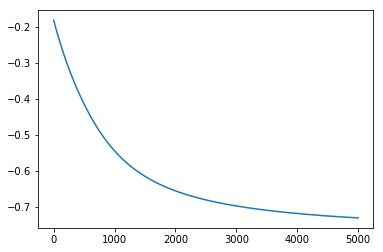

In [403]:
plot(j)
print(j[4999])
print(j[4998])
print(f)
print(a)
print(fv)
print(av)
print(ft)
print(at)

In [399]:
A = [[1,2,3],[4,5,6],[7,8,9]]
np.random.shuffle(A)
print(A)

[[1, 2, 3], [7, 8, 9], [4, 5, 6]]
